# TSA Passenger Throughput - Exploratory Data Analysis

This notebook provides a quick look at the `tsa_train.csv` dataset to help you get started.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
df = pd.read_csv('tsa_train.csv', parse_dates=['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

print(f"Data Range: {df.index.min()} to {df.index.max()}")
print(f"Total Days: {len(df)}")
df.head()

Data Range: 2019-01-01 00:00:00 to 2025-07-01 00:00:00
Total Days: 2374


,Volume
Date,
2019-01-01,2201765
2019-01-02,2424225
2019-01-03,2279384
2019-01-04,2230078
2019-01-05,2049460


## 1. Overall Time Series Plot
Visualizing the entire history to see trends, seasonality, and maybe some other major events(...)

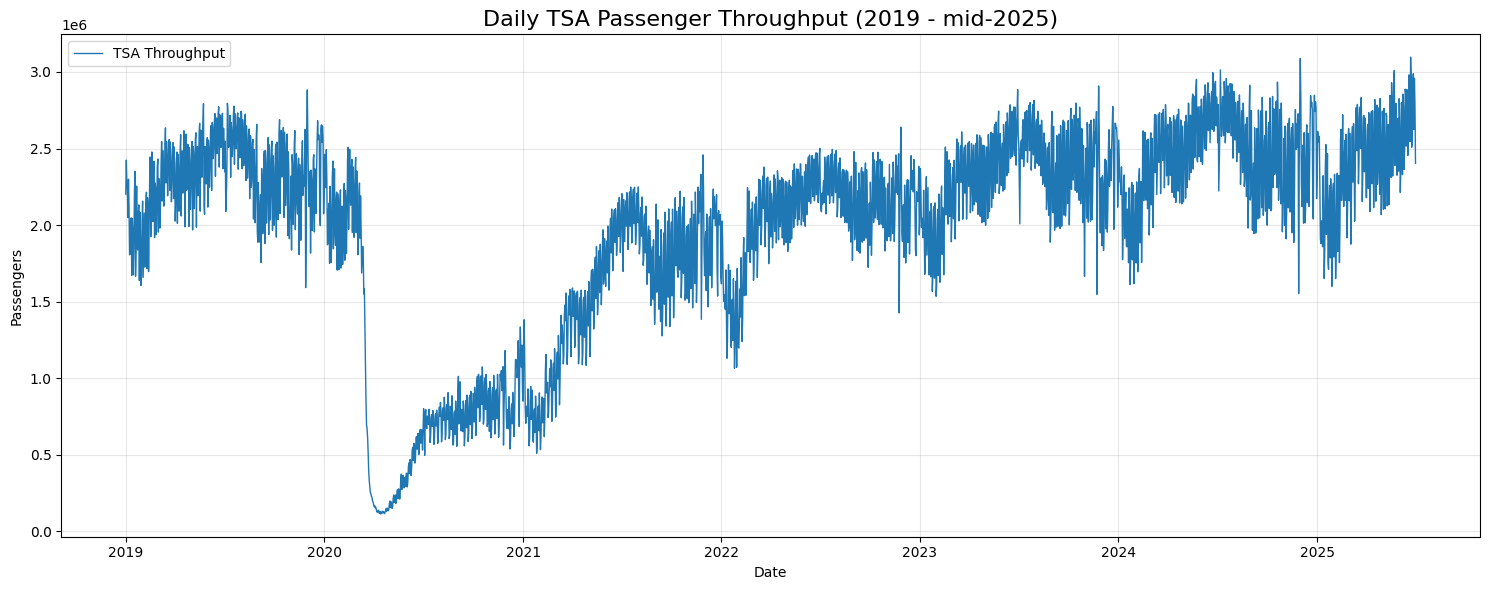

In [2]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Volume'], label='TSA Throughput', color='#1f77b4', linewidth=1)
plt.title('Daily TSA Passenger Throughput (2019 - mid-2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Weekly Seasonality
Air travel has strong weekly patterns. Let's look at the distribution by day of week.

/var/folders/0f/7q_f79kx42g40wsxgxgvx7lh0000gn/T/ipykernel_14210/115847267.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DayOfWeek', y='Volume', order=days_order, palette='viridis')


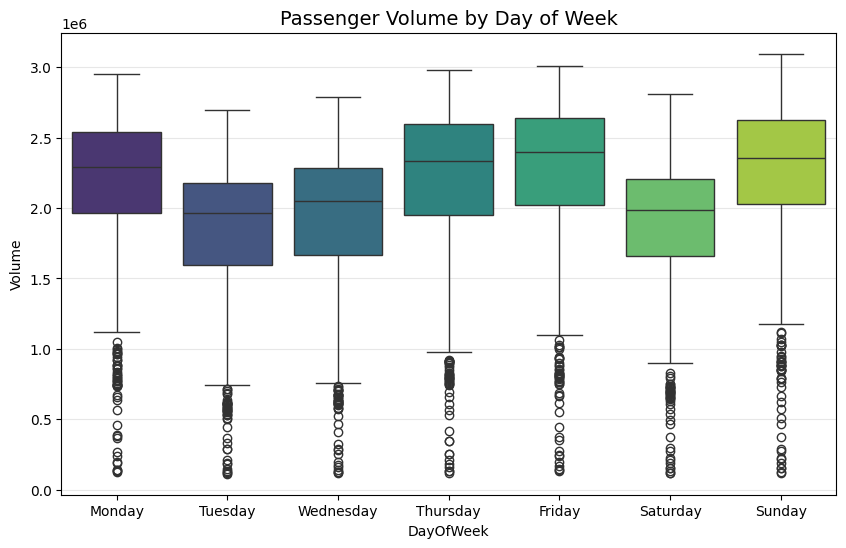

In [3]:
df['DayOfWeek'] = df.index.day_name()

# Order days correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DayOfWeek', y='Volume', order=days_order, palette='viridis')
plt.title('Passenger Volume by Day of Week', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## 3. Yearly Seasonality
Comparing years to see the recovery trend and recurring annual peaks.

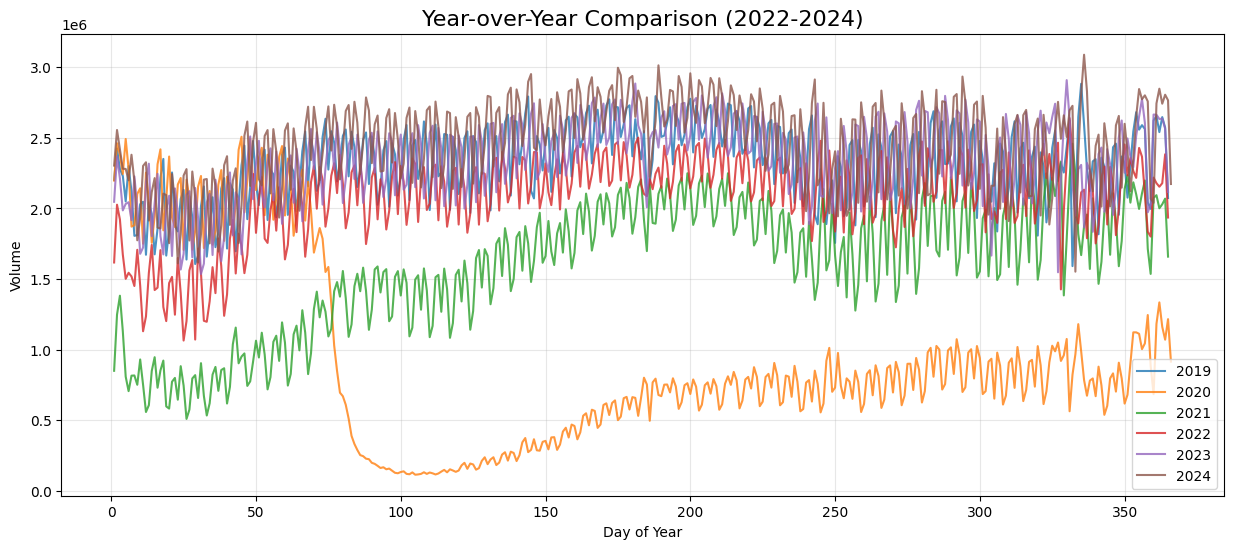

In [5]:
plt.figure(figsize=(15, 6))

# Filter for recent years only to verify stability
for year in [2019, 2020, 2021, 2022, 2023, 2024]:
    subset = df[df.index.year == year]
    # Plot against Day of Year to overlay them
    plt.plot(subset.index.dayofyear, subset['Volume'], label=str(year), alpha=0.8)

plt.title('Year-over-Year Comparison (2022-2024)', fontsize=16)
plt.xlabel('Day of Year')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()